# Import Libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import numpy as np

#  Load the Dataset

In [41]:
# Load the dataset
df = pd.read_csv('goldstock.csv')

# Display the first few rows to verify
print(df.head())


   Unnamed: 0        Date   Close    Volume    Open    High     Low
0           0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1           1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2           2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3           3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4           4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1


# Explore and Visualize the Data

In [43]:
# Display basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB
None


In [44]:
# Summary statistics
print(df.describe())

        Unnamed: 0        Close         Volume         Open         High  \
count  2511.000000  2511.000000    2511.000000  2511.000000  2511.000000   
mean   1260.792911  1498.726085  185970.770609  1498.725528  1508.451454   
std     729.262879   298.824811   97600.769382   299.118187   301.262244   
min       0.000000  1049.600000       1.000000  1051.500000  1062.700000   
25%     630.500000  1249.850000  126693.500000  1249.500000  1257.300000   
50%    1259.000000  1332.800000  175421.000000  1334.000000  1342.400000   
75%    1888.500000  1805.850000  234832.000000  1805.600000  1815.450000   
max    2532.000000  2093.100000  787217.000000  2094.400000  2098.200000   

               Low  
count  2511.000000  
mean   1488.869932  
std     296.417703  
min    1045.400000  
25%    1242.350000  
50%    1326.600000  
75%    1793.050000  
max    2074.600000  


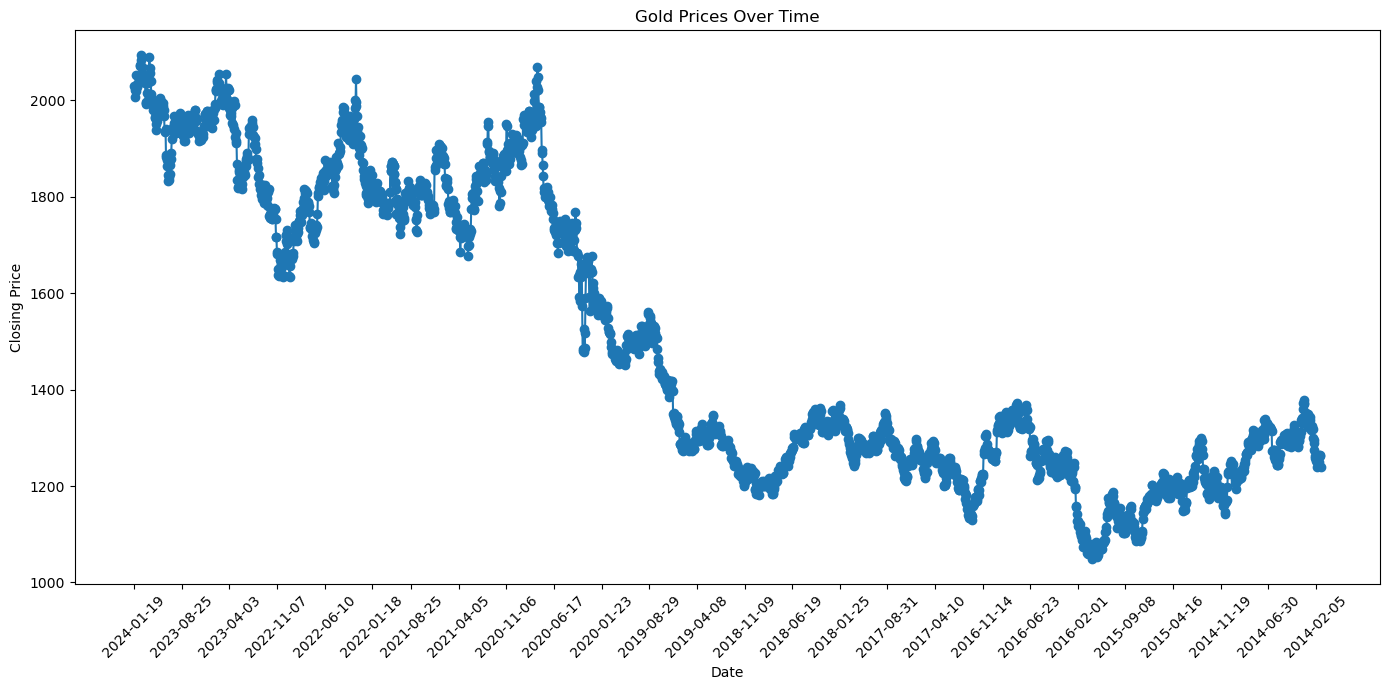

In [45]:
# Visualize closing prices over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-')
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(df['Date'].iloc[::100], rotation=45)
plt.tight_layout()
plt.show()

# Perform Time Series Analysis

In [46]:
# Convert 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'])


In [47]:
# Set 'Date' column as index
df.set_index('Date', inplace=True)

In [48]:
# Decompose the time series
decomposition = seasonal_decompose(df['Close'], model='additive', period=365)

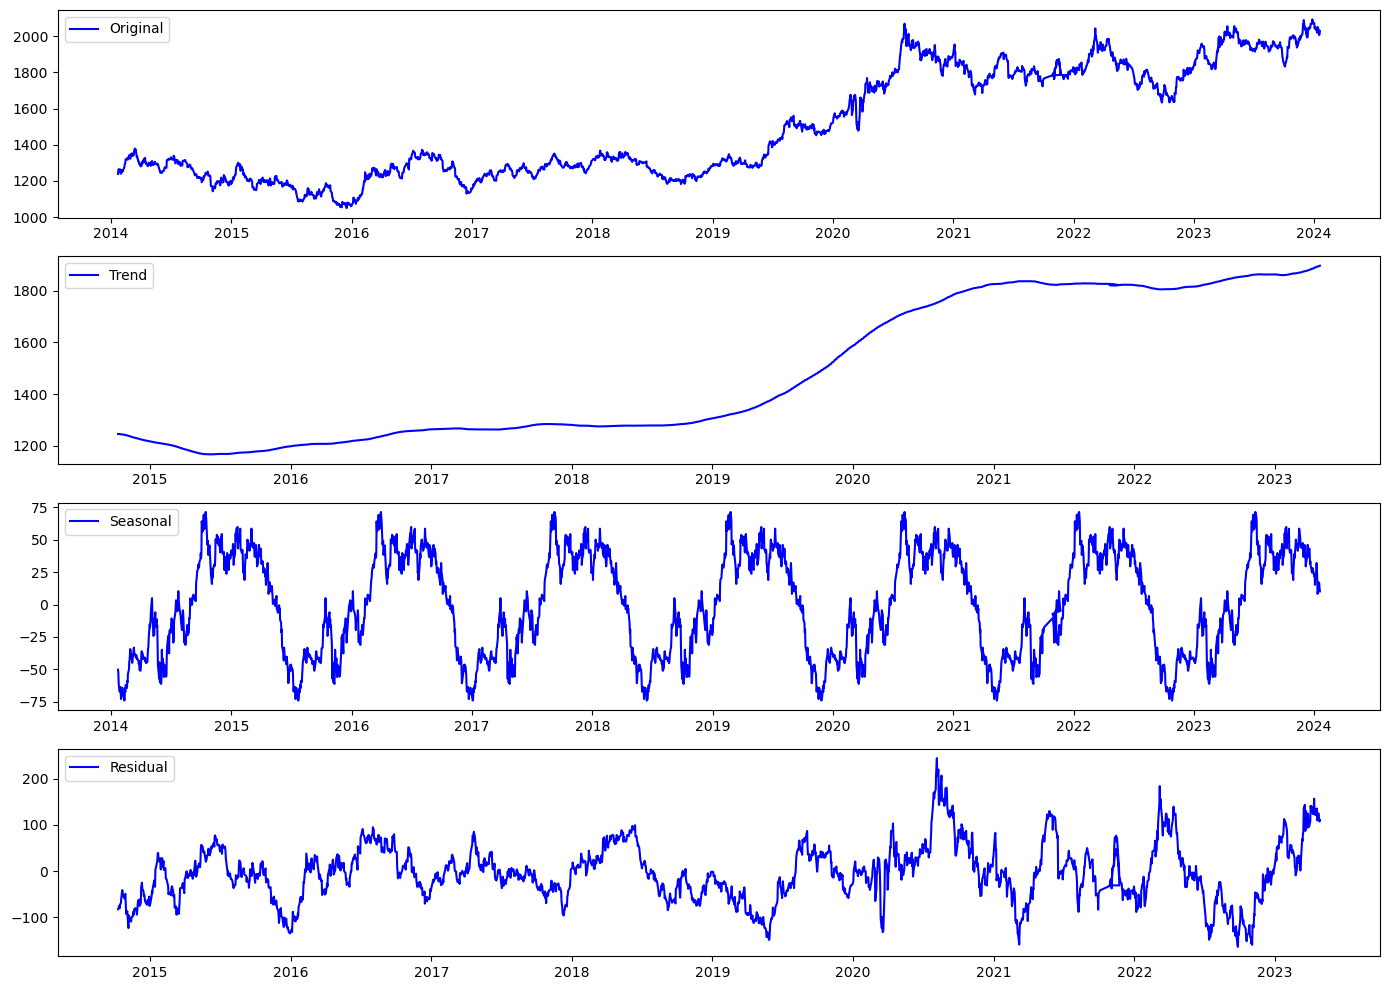

In [49]:
# Plot the decomposition
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(df['Close'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='blue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Define Functions for ARIMA and SARIMA Models

In [50]:
def fit_arima(df, order):
    model = ARIMA(df['Close'], order=order)
    model_fit = model.fit()
    return model_fit

def fit_sarima(df, order, seasonal_order):
    model = SARIMAX(df['Close'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    return model_fit


C:\Users\PMLS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PMLS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PMLS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PMLS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PMLS\anaconda3\Lib\site-packa

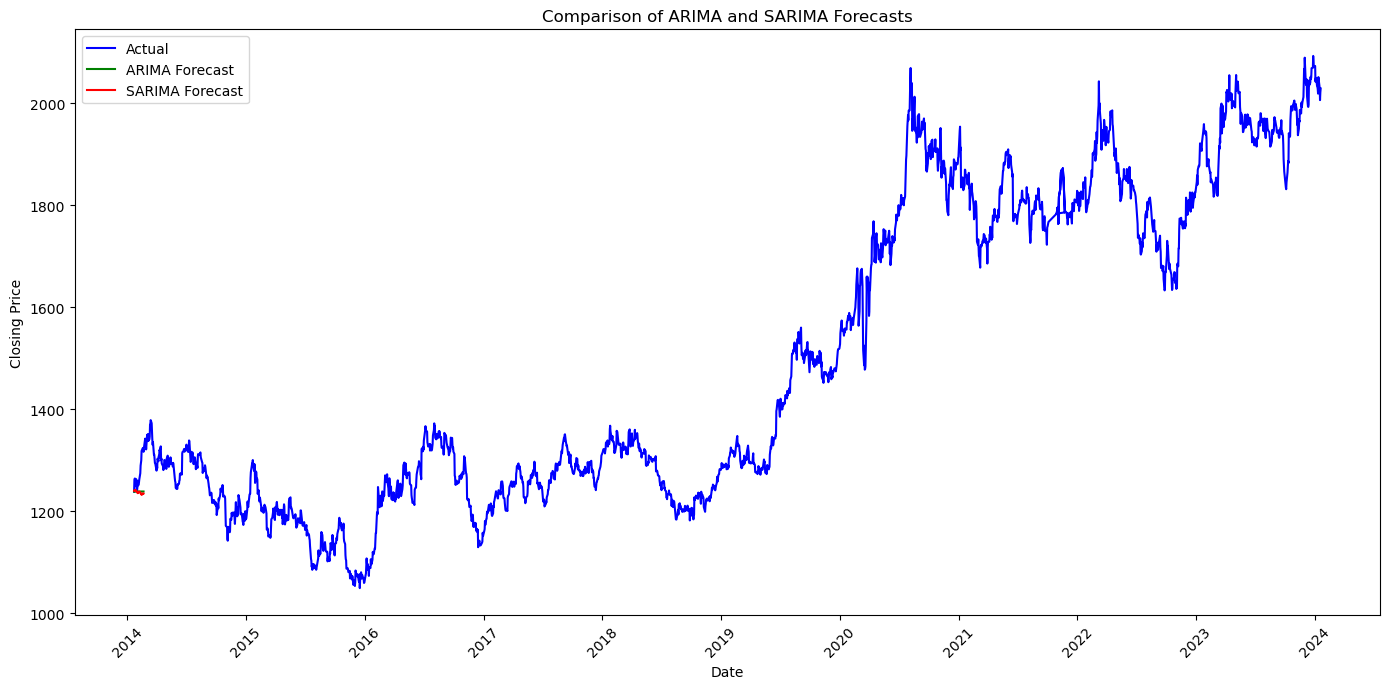

In [51]:
# Fit ARIMA model
arima_model = fit_arima(df, order=(5,1,0))  

# Fit SARIMA model
sarima_model = fit_sarima(df, order=(5,1,0), seasonal_order=(1,1,1,12))

# Forecast next 30 days for both models
arima_forecast = arima_model.forecast(steps=30)
sarima_forecast = sarima_model.forecast(steps=30)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual', color='blue')
plt.plot(pd.date_range(start=df.index[-1], periods=30, freq='D'), arima_forecast, label='ARIMA Forecast', color='green')
plt.plot(pd.date_range(start=df.index[-1], periods=30, freq='D'), sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('Comparison of ARIMA and SARIMA Forecasts')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:
# Evaluate Models

print("ARIMA AIC:", arima_model.aic)
print("SARIMA AIC:", sarima_model.aic)

# Calculate RMSE
actual = df['Close'].values[-30:]  # Actual values for the last 30 days
arima_rmse = np.sqrt(mean_squared_error(actual, arima_forecast))
sarima_rmse = np.sqrt(mean_squared_error(actual, sarima_forecast))

print("ARIMA RMSE:", arima_rmse)
print("SARIMA RMSE:", sarima_rmse)


ARIMA AIC: 20612.506509650033
SARIMA AIC: 20576.76286004477
ARIMA RMSE: 64.51030749078362
SARIMA RMSE: 64.64556265225664


In [53]:
# Forecasting with ARIMA (Example of a separate forecast)
model = ARIMA(df['Close'], order=(5,1,0))  # Example order, tune as needed
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)


C:\Users\PMLS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PMLS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PMLS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PMLS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PMLS\anaconda3\Lib\site-packa

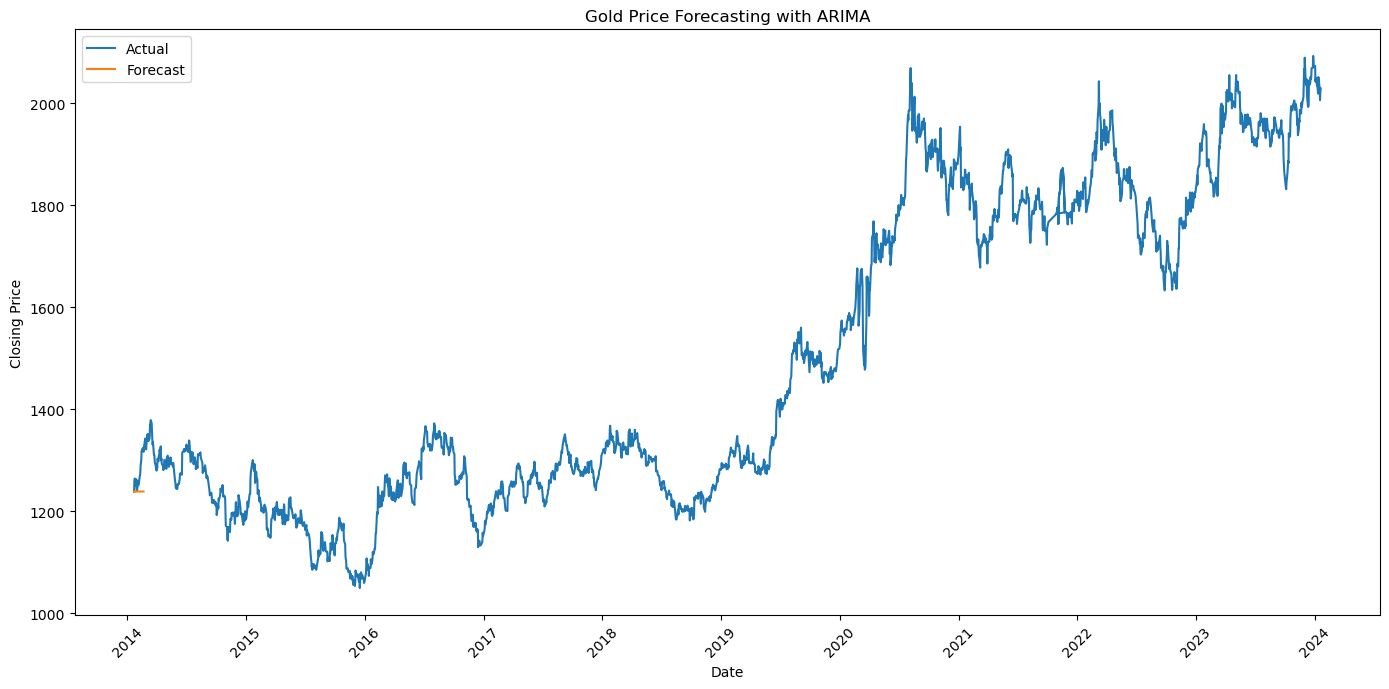

In [54]:
# Plotting Forecast
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual')
plt.plot(pd.date_range(start=df.index[-1], periods=30, freq='D'), forecast, label='Forecast')
plt.title('Gold Price Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

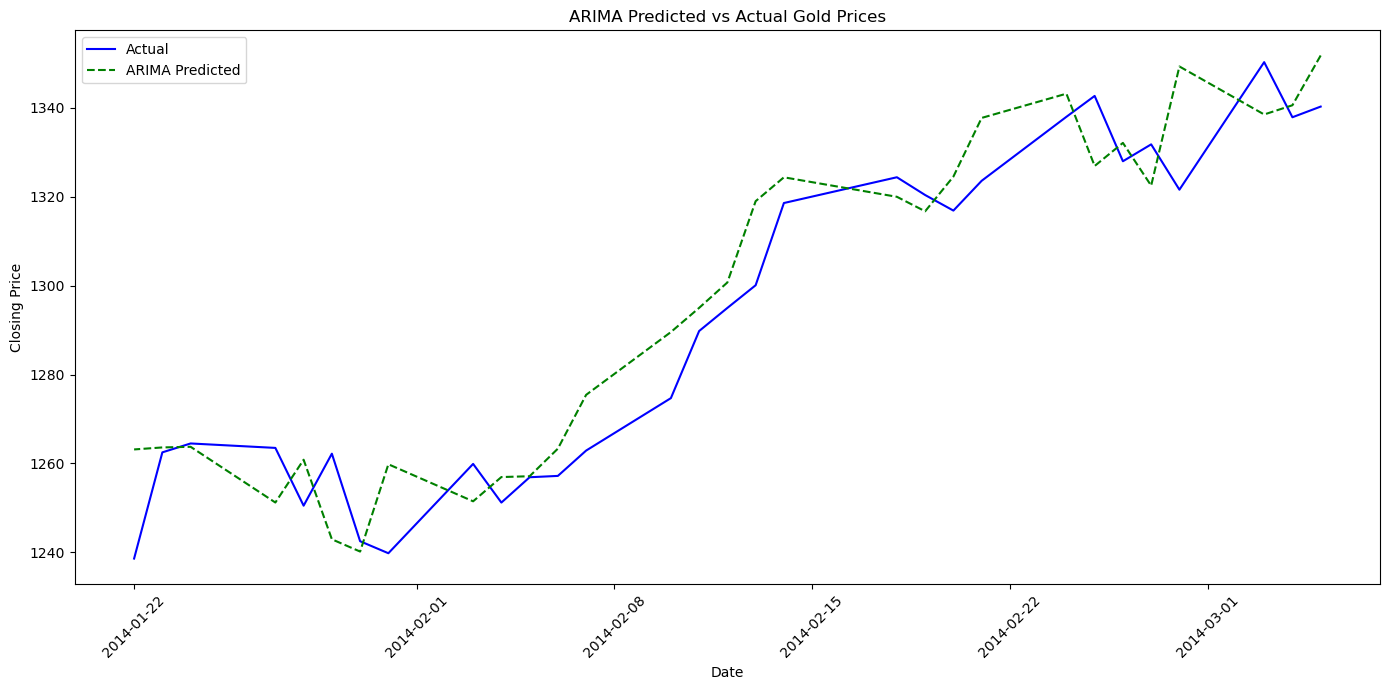

In [55]:
# Get the predicted values for the last 30 days
arima_predicted = model_fit.predict(start=df.index[-30], end=df.index[-1], typ='levels')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index[-30:], df['Close'].values[-30:], label='Actual', color='blue')
plt.plot(df.index[-30:], arima_predicted, label='ARIMA Predicted', color='green', linestyle='--')
plt.title('ARIMA Predicted vs Actual Gold Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()